In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def X_div_delta_st(r_array, xi):
    analitico = 1 / np.sqrt( (1-r_array**2)**2  + (2*xi*r_array)**2 )

    plt.figure(figsize=(10, 6))
    plt.plot(r_array, analitico, label='X/d', color='b', linewidth=2)
    plt.xlabel('Eje X', fontsize=14)
    plt.ylabel('Eje Y', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    return analitico

def frecuencia_natural(path, time1=10):
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)  # Más puntos para una mejor resolución de picos
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()

    ###################################

    arr_exp = np.linspace(0,5,100)
    X_div_delta_st(arr_exp,xi=xhi)






A = 1.3018881744771607, B = 0.3303318356820484, frecuencia = 4.697426834089618, phi = -1.8644138612415706
Delta entre pico 1 y pico 2: 0.0639
Delta entre pico 2 y pico 3: 0.0701
Delta entre pico 3 y pico 4: 0.0763
Delta entre pico 4 y pico 5: 0.0688
Delta entre pico 5 y pico 6: 0.0654
Delta entre pico 6 y pico 7: 0.0717
Delta entre pico 7 y pico 8: 0.0779
Delta entre pico 8 y pico 9: 0.0644
Delta entre pico 9 y pico 10: 0.0670
Delta entre pico 10 y pico 11: 0.0733
Delta entre pico 11 y pico 12: 0.0772
Delta entre pico 12 y pico 13: 0.0624
Delta entre pico 13 y pico 14: 0.0686
Delta entre pico 14 y pico 15: 0.0748
Delta entre pico 15 y pico 16: 0.0729
Delta entre pico 16 y pico 17: 0.0640
Delta entre pico 17 y pico 18: 0.0702
Delta entre pico 18 y pico 19: 0.0764
Delta entre pico 19 y pico 20: 0.0685
Delta entre pico 20 y pico 21: 0.0655
Delta entre pico 21 y pico 22: 0.0718
Delta entre pico 22 y pico 23: 0.0780
Delta entre pico 23 y pico 24: 0.0641
Delta entre pico 24 y pico 25: 0.0671

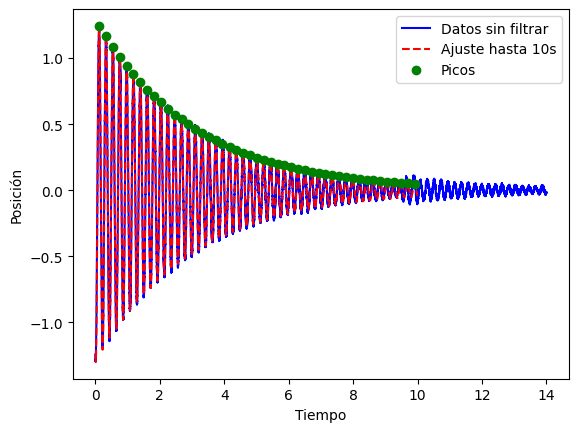

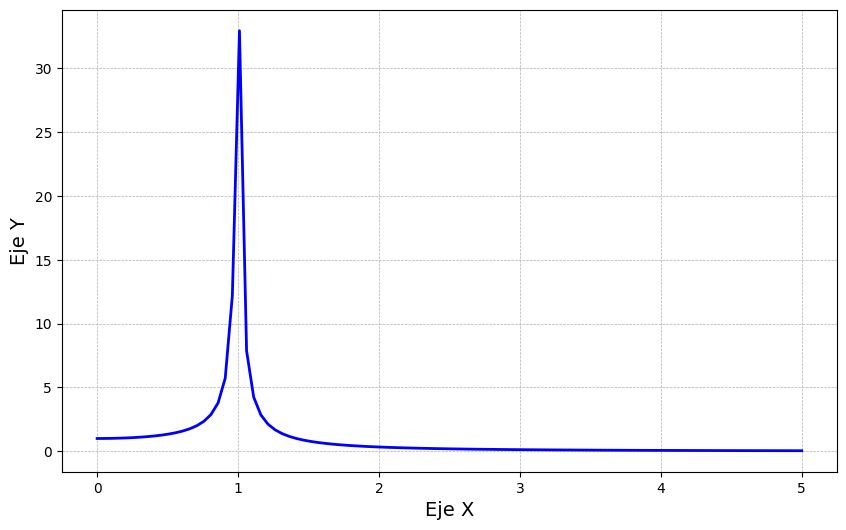

In [5]:
#frecuencia_natural(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv",9)
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv")


A = -0.41781550064088563, B = 0.36671228838558023, frecuencia = 4.722427877803568, phi = 0.5279617913817688
Delta entre pico 1 y pico 2: 0.0793
Delta entre pico 2 y pico 3: 0.0815
Delta entre pico 3 y pico 4: 0.0827
Delta entre pico 4 y pico 5: 0.0720
Delta entre pico 5 y pico 6: 0.0741
Delta entre pico 6 y pico 7: 0.0762
Delta entre pico 7 y pico 8: 0.0783
Delta entre pico 8 y pico 9: 0.0804
Delta entre pico 9 y pico 10: 0.0826
Delta entre pico 10 y pico 11: 0.0766
Delta entre pico 11 y pico 12: 0.0731
Delta entre pico 12 y pico 13: 0.0752
Delta entre pico 13 y pico 14: 0.0773
Delta entre pico 14 y pico 15: 0.0794
Delta entre pico 15 y pico 16: 0.0815
Delta entre pico 16 y pico 17: 0.0822
Delta entre pico 17 y pico 18: 0.0721
Delta entre pico 18 y pico 19: 0.0742
Delta entre pico 19 y pico 20: 0.0763
Delta entre pico 20 y pico 21: 0.0784
Delta entre pico 21 y pico 22: 0.0805
Delta entre pico 22 y pico 23: 0.0827
Delta entre pico 23 y pico 24: 0.0761
Delta entre pico 24 y pico 25: 0.07

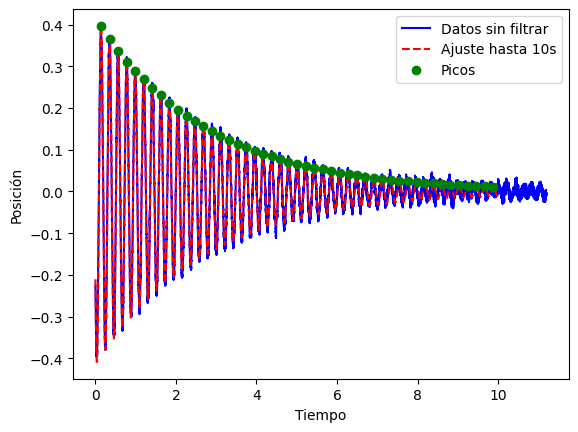

A = 0.6459292491652804, B = 0.34152831209264367, frecuencia = 4.710689803133185, phi = -1.8198972752218687
Delta entre pico 1 y pico 2: 0.0719
Delta entre pico 2 y pico 3: 0.0673
Delta entre pico 3 y pico 4: 0.0711
Delta entre pico 4 y pico 5: 0.0749
Delta entre pico 5 y pico 6: 0.0787
Delta entre pico 6 y pico 7: 0.0694
Delta entre pico 7 y pico 8: 0.0680
Delta entre pico 8 y pico 9: 0.0717
Delta entre pico 9 y pico 10: 0.0755
Delta entre pico 10 y pico 11: 0.0793
Delta entre pico 11 y pico 12: 0.0669
Delta entre pico 12 y pico 13: 0.0686
Delta entre pico 13 y pico 14: 0.0724
Delta entre pico 14 y pico 15: 0.0762
Delta entre pico 15 y pico 16: 0.0789
Delta entre pico 16 y pico 17: 0.0655
Delta entre pico 17 y pico 18: 0.0693
Delta entre pico 18 y pico 19: 0.0730
Delta entre pico 19 y pico 20: 0.0768
Delta entre pico 20 y pico 21: 0.0764
Delta entre pico 21 y pico 22: 0.0661
Delta entre pico 22 y pico 23: 0.0699
Delta entre pico 23 y pico 24: 0.0737
Delta entre pico 24 y pico 25: 0.077

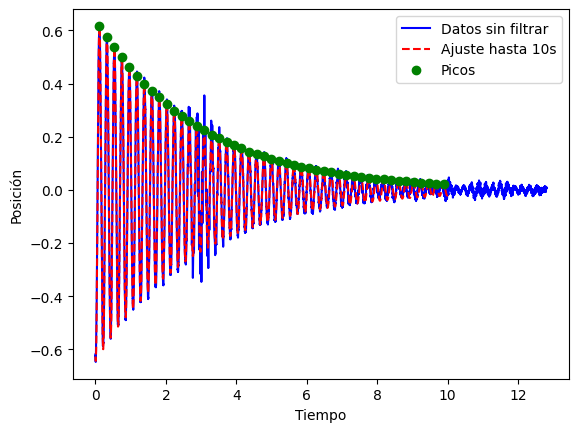

A = 0.6899404027884188, B = 0.3324449092889549, frecuencia = 4.709146140886744, phi = -1.5108506729445716
Delta entre pico 1 y pico 2: 0.0724
Delta entre pico 2 y pico 3: 0.0647
Delta entre pico 3 y pico 4: 0.0688
Delta entre pico 4 y pico 5: 0.0728
Delta entre pico 5 y pico 6: 0.0768
Delta entre pico 6 y pico 7: 0.0675
Delta entre pico 7 y pico 8: 0.0660
Delta entre pico 8 y pico 9: 0.0701
Delta entre pico 9 y pico 10: 0.0741
Delta entre pico 10 y pico 11: 0.0775
Delta entre pico 11 y pico 12: 0.0633
Delta entre pico 12 y pico 13: 0.0674
Delta entre pico 13 y pico 14: 0.0714
Delta entre pico 14 y pico 15: 0.0754
Delta entre pico 15 y pico 16: 0.0726
Delta entre pico 16 y pico 17: 0.0647
Delta entre pico 17 y pico 18: 0.0687
Delta entre pico 18 y pico 19: 0.0727
Delta entre pico 19 y pico 20: 0.0768
Delta entre pico 20 y pico 21: 0.0678
Delta entre pico 21 y pico 22: 0.0660
Delta entre pico 22 y pico 23: 0.0700
Delta entre pico 23 y pico 24: 0.0740
Delta entre pico 24 y pico 25: 0.0777

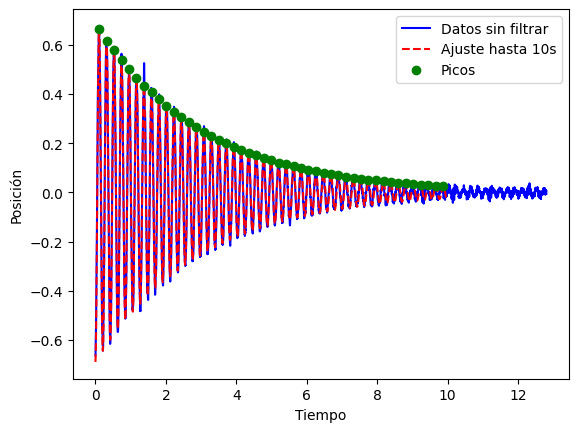

A = 0.6562062137139495, B = 0.34029185443693644, frecuencia = 4.710387041962717, phi = 0.26432382144488653
Delta entre pico 1 y pico 2: 0.0740
Delta entre pico 2 y pico 3: 0.0664
Delta entre pico 3 y pico 4: 0.0703
Delta entre pico 4 y pico 5: 0.0741
Delta entre pico 5 y pico 6: 0.0779
Delta entre pico 6 y pico 7: 0.0710
Delta entre pico 7 y pico 8: 0.0672
Delta entre pico 8 y pico 9: 0.0710
Delta entre pico 9 y pico 10: 0.0749
Delta entre pico 10 y pico 11: 0.0787
Delta entre pico 11 y pico 12: 0.0681
Delta entre pico 12 y pico 13: 0.0680
Delta entre pico 13 y pico 14: 0.0718
Delta entre pico 14 y pico 15: 0.0756
Delta entre pico 15 y pico 16: 0.0795
Delta entre pico 16 y pico 17: 0.0651
Delta entre pico 17 y pico 18: 0.0688
Delta entre pico 18 y pico 19: 0.0726
Delta entre pico 19 y pico 20: 0.0764
Delta entre pico 20 y pico 21: 0.0767
Delta entre pico 21 y pico 22: 0.0657
Delta entre pico 22 y pico 23: 0.0695
Delta entre pico 23 y pico 24: 0.0734
Delta entre pico 24 y pico 25: 0.077

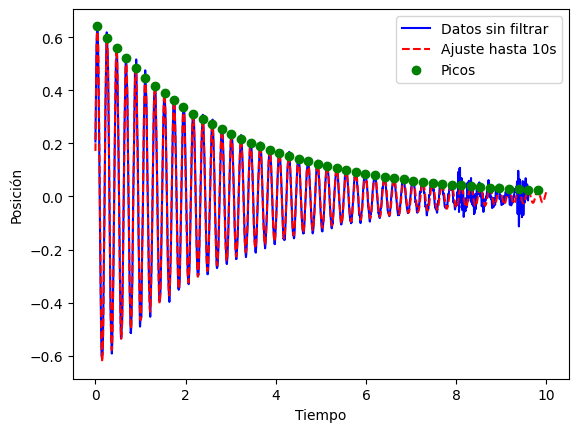

A = 0.6562062137139495, B = 0.34029185443693644, frecuencia = 4.710387041962717, phi = 0.26432382144488653
Delta entre pico 1 y pico 2: 0.0740
Delta entre pico 2 y pico 3: 0.0664
Delta entre pico 3 y pico 4: 0.0703
Delta entre pico 4 y pico 5: 0.0741
Delta entre pico 5 y pico 6: 0.0779
Delta entre pico 6 y pico 7: 0.0710
Delta entre pico 7 y pico 8: 0.0672
Delta entre pico 8 y pico 9: 0.0710
Delta entre pico 9 y pico 10: 0.0749
Delta entre pico 10 y pico 11: 0.0787
Delta entre pico 11 y pico 12: 0.0681
Delta entre pico 12 y pico 13: 0.0680
Delta entre pico 13 y pico 14: 0.0718
Delta entre pico 14 y pico 15: 0.0756
Delta entre pico 15 y pico 16: 0.0795
Delta entre pico 16 y pico 17: 0.0651
Delta entre pico 17 y pico 18: 0.0688
Delta entre pico 18 y pico 19: 0.0726
Delta entre pico 19 y pico 20: 0.0764
Delta entre pico 20 y pico 21: 0.0767
Delta entre pico 21 y pico 22: 0.0657
Delta entre pico 22 y pico 23: 0.0695
Delta entre pico 23 y pico 24: 0.0734
Delta entre pico 24 y pico 25: 0.077

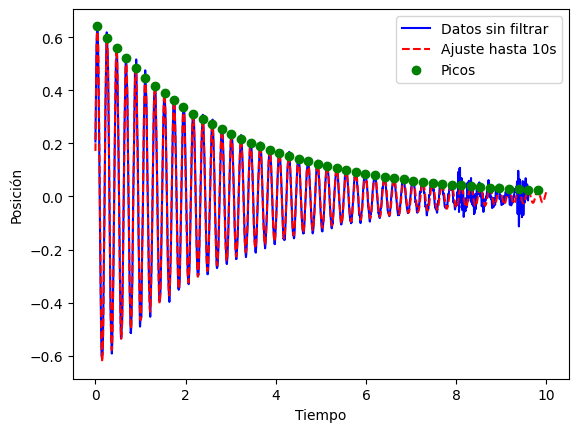

In [4]:
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-02)\DataRecor2.csv")
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-33)\DataRecor2.csv")
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-10)\DataRecor2.csv")
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
frecuencia_natural(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")